# Distribuição Binomial
### Estudo de distribuição Bernoulli e Binomial com aplicação na chance de drop de montarias no jogo World of Warcraft

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    Na distribuição binomial, usamos a técnica de contagem 'Combinatória' pois consideramos a chance de haver 1 sucesso seja qualquer numero de tentativas (ou seja, a contagem de 'escolher' 2 pessoas num grupo de 10 funciona para o caso de querermos dois sucessos em 10 tentativas). Junto a isso, fazemos a multiplicação intuitiva das probabilidades para os casos de sucesso e fracasso. Isso somente funciona se considerarmos as tentativas INDEPENDENTES, como em casos de jogar moedas e dados honestos.

    Nesse problema quero saber mais ou menos quantas tentativas são necessárias para rolar pelo menos 1 drop de uma montaria de 5% de chance. O problema é que se eu utilizar apenas a distribuição binomial, consideraremos também as tentativas fracassadas APÓS o sucesso. Para driblar esse problema quero tentar duas ideias!

 - Primeira ideia: 
        A simples aplicação da distribuição binomial, mas consideraremos PELO MENOS 1 sucesso. Para esse caso, usarei a ideia de que a soma das probabilidades devem ser 1 (100%) para calcular a chance de haver apenas fracassos e depois subtrair de 1. 

O lance aqui é que o resultado não será muito pragmático, pois calculara a probabilidade de conseguir PELO MENOS 1 sucesso em n tentativas, mas assumindo que o jogadores tente varias vezes mesmo após o drop. Sabemos que na vida real tendemos a parar de tentar o farm após o primeiro sucesso. Mas mesmo assim, quero saber quantas tentativas nos aproximam dos 100% de drop.

In [7]:
def pelo_menos_1_sucesso(tentativas,fracasso):
    '''
    Dado o n° tentativas e a probabilidade de fracasso, retorna o valor da probabilidade de 
    pelo menos 1 sucesso em %.
    '''
    fracasso_total = fracasso**tentativas
    return (1-fracasso_total)*100

In [158]:
def qts_tentativas(fracasso,tentativas):
    '''
    Função recebe a probabilidade de fracasso e o numero de tentativas.
    Retorna lista com as probabilidades de se ter PELO MENOS 1 sucesso entre 1~150 tentativas
    '''
    l=[]
    for i in range(tentativas):
        l.append(pelo_menos_1_sucesso(i,fracasso))
    return l

def tentativa_max(lista,n):
    '''
    Função que recebe lista de probabilidades e a n% minima.
    Retorna a tentativa mínima para que se tenha PELO MENOS 1 sucesso com n% de certeza
    '''
    for i in range(len(lista)):
        if lista[i]>n:
            return i
            break

In [12]:
pelo_menos_1_sucesso(14,0.95) #Pelo menos 1 sucesso em 14 tentativas

51.23250208844705

In [144]:
tentativa_max(qts_tentativas(0.95,150),98)

77


In [145]:
tentativa_max(qts_tentativas(0.95,150),50)

14


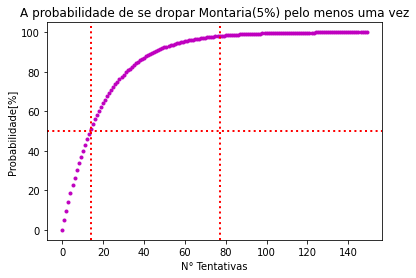

A partir de 14 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 77 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [151]:
plt.title('A probabilidade de se dropar Montaria(5%) pelo menos uma vez')
plt.plot(range(150), qts_tentativas(0.95,150),'m.')
plt.xlabel('N° Tentativas')
plt.ylabel('Probabilidade[%]')

plt.axhline(50, color='r', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(14, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)

plt.axvline(77, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(14)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de 77 tentativas, temos probabilidade próxima dos 100% de sucesso.')

 - A segunda Ideia:
        Encontrar uma forma de randomizar a probabilidade de drop, simular um grande numero de jogadores e guardar suas tentativas até o primeiro sucesso. Depois, plotar a quantidade de casos/numero de tentativas e ver qual o provavel numero de tentativas (acima de 50% dos jogadores).

In [40]:
c = [] #Lista de 1 a 100
for i in range(1,101):
    c.append(i)

In [95]:
def chance_sucesso(sucesso=0.05):
    '''
    Função que retorna uma lista de 1000 elementos
    mostrando quantas tentativas foram necessárias para haver o primeiro sucesso. 
    Considera chance de sucesso padrão de 5%. Recebe a chance de sucesso em DECIMAL.
    '''
    fracasso = 1-sucesso
    l=[]
    tentativas = 1
    while tentativas < 1000 and len(l) < 1000:
        if random.choice(c) <= (sucesso*100): # Se o numero escolhido randomicamente entre 100 for menor ou igual a chance de sucesso em %, resulta em sucesso!
            l.append(tentativas)
            tentativas = 1
        else:
            tentativas += 1
    return l

In [98]:
f = pd.Series(chance_sucesso())
type(f)
f.describe()

count    1000.000000
mean       19.271000
std        19.324363
min         1.000000
25%         6.000000
50%        13.000000
75%        26.250000
max       164.000000
dtype: float64

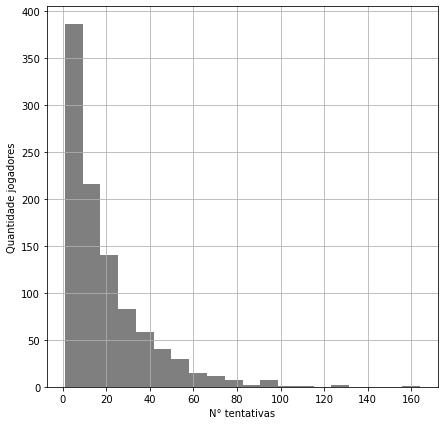

In [109]:
#A cada 1000 jogadores, quantos conseguirão o drop em quantas tentativas? 
f.hist(color="k", alpha=0.5, bins=20, figsize=[7,7])
plt.xlabel('N° tentativas')
plt.ylabel('Quantidade jogadores')
plt.show()

    Ou seja, a maioria dos jogadores conseguirá o drop nas primeiras 10 tentativas. A média de tentativas até o drop será por volta de 20. O jogador mais azarado precisará de mais de 160 tentativas para conseguir.

- Vamos fazer para um drop mais raro, digamos 1%:

In [100]:
invencivel = pd.Series(chance_sucesso(0.01))
invencivel.describe()

count    1000.0000
mean      102.8140
std       103.1498
min         1.0000
25%        30.0000
50%        73.0000
75%       140.0000
max       718.0000
dtype: float64

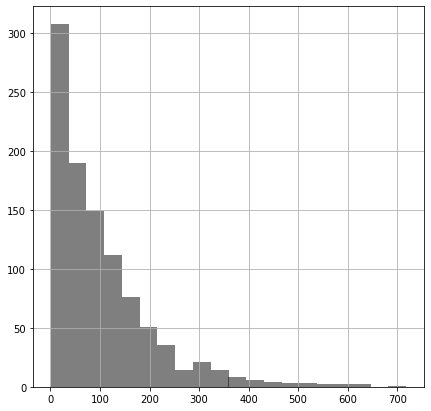

In [101]:
invencivel.hist(color="k", alpha=0.5, bins=20, figsize=[7,7])
plt.show()

    Nesse caso, o grosso dos jogadores precisará tentar entre 1 ~ 30 vezes para conseguir a montaria. 

In [103]:
cinzas_alar = pd.Series(chance_sucesso(0.02))
cinzas_alar.describe()

count    1000.000000
mean       48.632000
std        48.568627
min         1.000000
25%        14.000000
50%        34.000000
75%        65.000000
max       365.000000
dtype: float64

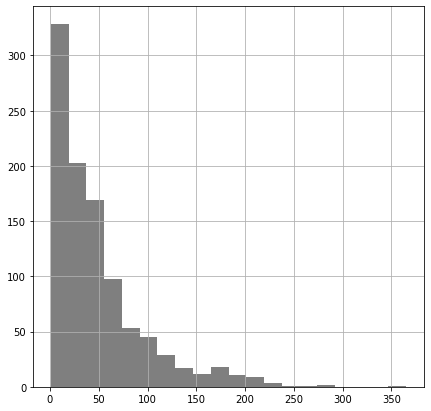

In [105]:
cinzas_alar.hist(color="k", alpha=0.5, bins=20, figsize=[7,7])
plt.show()

    O grosso dos jogadores conseguirão as cinzas de al'ar nas primeiras 15 tentativas. A média de tentativas até o drop é de 48. O jogador mais azarado precisará tentar 365 vezes.

In [159]:
cinc = tentativa_max(qts_tentativas(0.98,300),50)
cem = tentativa_max(qts_tentativas(0.98,300),98)

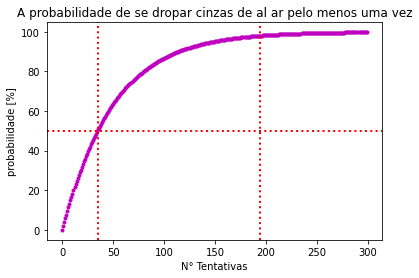

A partir de 35 tentativas, temos probabilidade de sucesso acima de 50%.

A partir de 194 tentativas, temos probabilidade próxima dos 100% de sucesso.


In [161]:
plt.title('A probabilidade de se dropar cinzas de al ar pelo menos uma vez')
plt.plot(range(300), qts_tentativas(0.98,300),'m.')
plt.xlabel('N° Tentativas')
plt.ylabel('probabilidade [%]')
plt.axhline(50, color='r', linestyle='dotted', linewidth=2) # probabilidade que julgo aceitavel
plt.axvline(cinc, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(aceitavel)
plt.axvline(cem, color='r', linestyle='dotted', linewidth=2) # tentativas para a prob(suesso) ser quase certa
plt.show()
print('A partir de '+str(cinc)+' tentativas, temos probabilidade de sucesso acima de 50%.\n')
print('A partir de '+str(cem)+' tentativas, temos probabilidade próxima dos 100% de sucesso.')